# Part II - Key Data Insights from Ford GoBike Trip Data 
## by Tenifayo Fagbemi

## Investigation Overview


> I wanted to investigate how member age, user type, day of the week, time, gender and whether a trip is a bike share for all trip affected the duration of the trip.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system in February 2019 covering the greater San Francisco Bay area. There are 183,412 individual rides in this dataset with 16 features. Some of these features are trip duration, member gender, birth year, user_type, station name and location.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Data Wrangling

df = bike_data.copy()
df['member_birth_year'] = df['member_birth_year'].replace(1878, 1978)
df['member_birth_year'].fillna(int(df['member_birth_year'].mean()), inplace=True)
df['member_birth_year'] = df['member_birth_year'].astype('int')

df['member_gender'].fillna("Male", inplace=True)
df['member_gender'] = df['member_gender'].astype('category')

df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [4]:
#Feature Engineering

df['duration_min'] = df['duration_sec']/ 60

df['member_age'] = 2019 - df['member_birth_year']
df['member_age'] = df['member_age'].astype('int')

df['Day_of_week'] = df['start_time'].dt.strftime('%A')
df['time'] = df['start_time'].dt.strftime('%H')

## Distribution of Trip Duration

The distribution of duration(in mins) was right skewed. On plotting it on a log scale to remove the skewness, it shows that
the modal trip duration is between 7 and 10 minutes. Also, there are very few rides with durations more than 70 minutes.

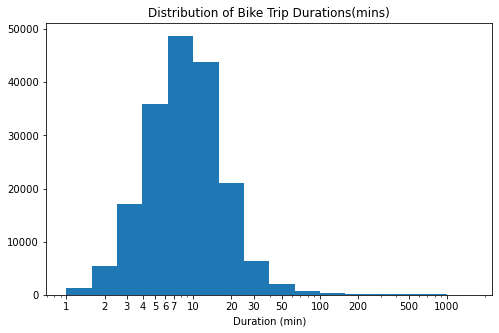

In [5]:
bins = 10 ** np.arange(np.log10(1), np.log10(df['duration_min'].max())+0.2,0.2)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_min',bins=bins)
plt.xscale('log')  #log transfrormation
plt.xticks([1,2,3,4,5,6,7,10,20,30,50,100,200,500,1000], [1,2,3,4,5,6,7,10,20,30,50,100,200,500,1000])
plt.xlabel('Duration (min)')
plt.title("Distribution of Bike Trip Durations(mins)")
plt.show();

## Age Distribution of Members 

Most of the members are between the age 25 and 40 years. The modal age is between 29 and 32 years. Thera are few members above the age of 70.

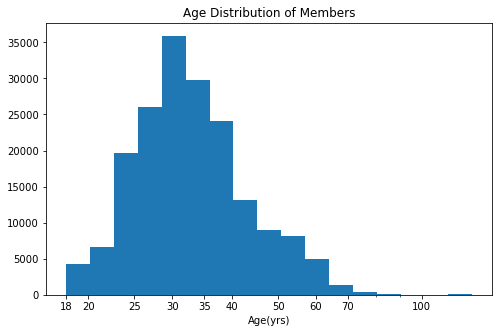

In [6]:
bins = 10 ** np.arange(np.log10(18), np.log10(df['member_age'].max())+0.05,0.05)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='member_age', bins=bins);
plt.xscale("log") # log transformation
plt.xticks([18,20,25,30,35,40,50,60,70,100], [18,20,25,30,35,40,50,60,70,100])
plt.xlabel("Age(yrs)")
plt.title("Age Distribution of Members")
plt.show()

## Type and Gender of Most Members.


Most of the members of fordgobike trip are male subscribers.

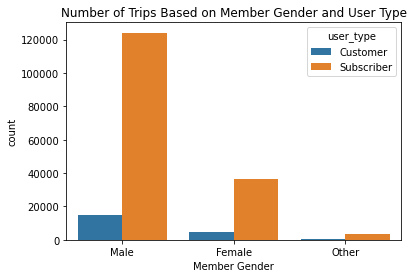

In [7]:
sb.countplot(data=df, x='member_gender', order=bike_data['member_gender'].value_counts().index, hue="user_type")
plt.title("Number of Trips Based on Member Gender and User Type")
plt.xlabel("Member Gender")
plt.show()

## Average Trip Duration 

The average trip duration is longer on weekends even though the day of the week with the highest number of trips is Thursday. From Mondays to Fridays (weekdays), there is little variation in the average trip duration but on Saturdays and Sundays, there is a spike in the average duration. Members tend to take longer trips on weekends. 


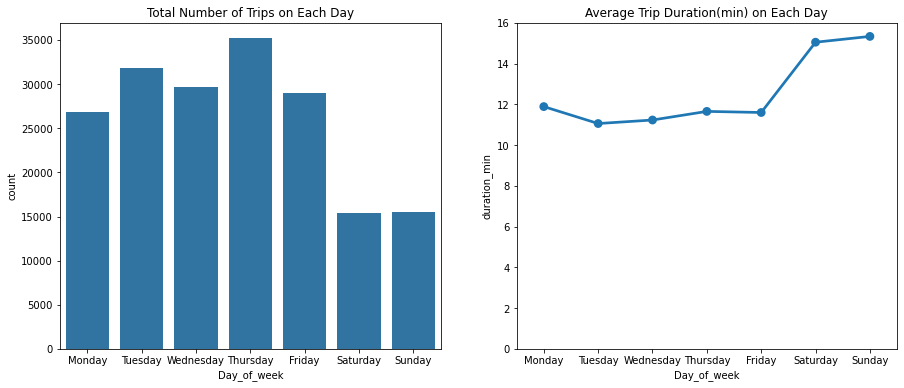

In [9]:
days = ["Monday",'Tuesday',"Wednesday","Thursday","Friday","Saturday","Sunday"]

fig,ax = plt.subplots(nrows=1,ncols=2, figsize = [15,6])
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='Day_of_week',order=days, color = base_color, ax=ax[0])
# plt.xticks(rotation = 20)
ax[0].set_title("Total Number of Trips on Each Day")
plt.xlabel("Day of Week");
sb.pointplot(data=df, x='Day_of_week', y='duration_min', order=days, ci=None, ax=ax[1])
ax[1].set_ylim(0,16)
ax[1].set_title("Average Trip Duration(min) on Each Day")
plt.show()

## Duration of Bike Share for All Trips

Few bike share for all trips have a duration more than 60 mins(1 hour) compared to trips that are not bike share for all trips.

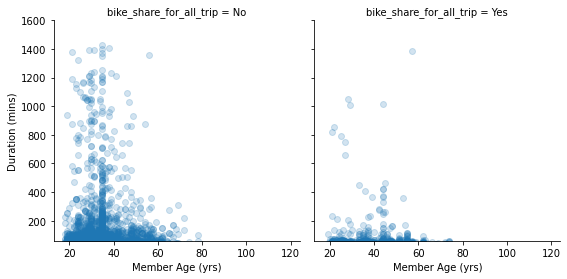

In [10]:
g = sb.FacetGrid(data=df, col='bike_share_for_all_trip', height=4)
g.map(plt.scatter,'member_age', 'duration_min', alpha=0.2)
g.set(ylim=(60,1600))
g.set_axis_labels("Member Age (yrs)","Duration (mins)");

## Average Duration per Day for Each User Type

On every day of the week, Customers have a higher average trip duration than subscribers. For both user types, average trip duration is highest on weekends (Saturday and Sunday).

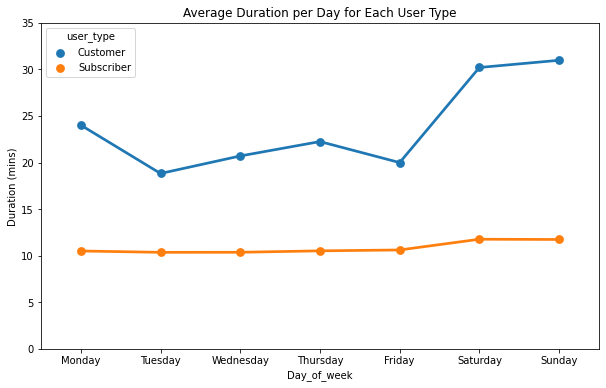

In [11]:

plt.figure(figsize=(10,6))
sb.pointplot(data=df, x='Day_of_week', y='duration_min', order=days, hue = "user_type", ci=None)
plt.ylim(0,35)
plt.ylabel("Duration (mins)")
plt.title("Average Duration per Day for Each User Type")
plt.show()

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert Key_Insights_from_Ford_GoBike_Trip_Data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Key_Insights_from_Ford_Go_Bike_Trip_Data.ipynb to slides
[NbConvertApp] Writing 717422 bytes to Key_Insights_from_Ford_Go_Bike_Trip_Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\tenifayo\anaconda3\envs\likemindsproject\lib\runpy.py", line 192, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\tenifayo\anaconda3\envs\likemindsproject\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Tenifayo\Anaconda3\envs\likemindsproject\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\tenifayo\anaconda3\envs\likemindsproject\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\tenifayo\anaconda3\envs\likemindsproject\lib\site-packag